In [1]:
from google.colab import drive
drive.mount('/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import json
with open("/drive/My Drive/data/kaggle.json", "r") as f:
  data = json.loads(f.read())

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = data['username'] # username from the json file
os.environ['KAGGLE_KEY'] = data['key'] # key from the json file
!kaggle competitions download -c Kannada-MNIST # api copied from kaggle

  0% 0.00/33.1k [00:00<?, ?B/s]
100% 33.1k/33.1k [00:00<00:00, 49.2MB/s]
  0% 0.00/818k [00:00<?, ?B/s]
100% 818k/818k [00:00<00:00, 53.0MB/s]
 52% 5.00M/9.71M [00:00<00:00, 19.7MB/s]
100% 9.71M/9.71M [00:00<00:00, 32.2MB/s]
  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 129MB/s]


In [4]:
!unzip Dig-MNIST.csv.zip
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  Dig-MNIST.csv.zip
  inflating: Dig-MNIST.csv           
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [0]:
import pandas as pd
import numpy as np


In [0]:
data = pd.read_csv("Dig-MNIST.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [7]:
test.head()

id  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0   0       0       0       0  ...         0         0         0         0
1   1       0       0       0  ...         0         0         0         0
2   2       0       0       0  ...         0         0         0         0
3   3       0       0       0  ...         0         0         0         0
4   4       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [8]:
train.head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      0       0       0       0  ...         0         0         0         0
1      1       0       0       0  ...         0         0         0         0
2      2       0       0       0  ...         0         0         0         0
3      3       0       0       0  ...         0         0         0         0
4      4       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [9]:
train.groupby("label").size()


label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

# Our classes are balanced

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Classes')

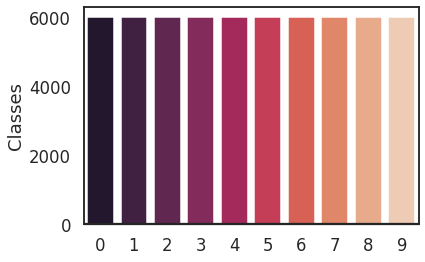

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")

sns.barplot(x=train["label"].unique().tolist(), y=train.groupby("label").size().tolist(), palette="rocket")
plt.axhline(0, color="k", clip_on=False)
plt.ylabel("Classes")

In [11]:
data.head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      0       0       0       0  ...         0         0         0         0
1      1       0       0       0  ...         0         0         0         0
2      2       0       0       0  ...         0         0         0         0
3      3       0       0       0  ...         0         0         0         0
4      4       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

### The size of the picture will be 28*28



In [12]:
import math 
math.sqrt(784)

28.0

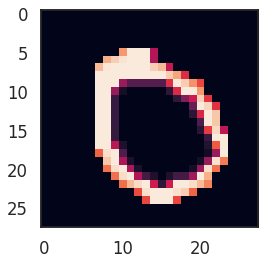

In [13]:
first_row = data.loc[0, data.columns != 'label']
img = first_row.to_numpy()
plt.imshow(img.reshape(28,28))

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import sys
from time import sleep

batch_size=200
INPUT_SIZE=28
hidden_size = 128
nb_class = len(list(train.groupby("label").size()))

AttributeError: ignored

In [33]:
y_true = train["label"]
y_true.shape


TypeError: ignored

In [0]:
X_train = train.drop(columns="label")
X_train.shape


In [0]:
from sklearn.model_selection import train_test_split
#@markdown  ###Use cross validation to validate our model

In [0]:
X_train_, X_val,  y_train_, y_val = train_test_split(X_train, y_true, test_size=0.30, random_state = 42)

In [0]:
class LSTM(nn.Module):

  def __init__(self, INPUT_SIZE, hidden_size, batch_size, nb_class):
    super(LSTM, self).__init__()
    self.hidden_size = hidden_size
    self.batch_size = batch_size
    self.rnn = nn.LSTM(
            input_size=INPUT_SIZE,
            hidden_size=hidden_size           # number of rnn layer
            )
    self.out = nn.Linear(hidden_size, nb_class)
  def forward(self, x):
    # Set initial hidden and cell states 
    h0 = torch.zeros(1, x.size(1), self.hidden_size)
    c0 = torch.zeros(1, x.size(1), self.hidden_size)
    # Forward propagate LSTM
    output, _ = self.rnn(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
    # Decode the hidden state of the last time step
    outputs = self.out(output[:, -1, :])
    return outputs

    
    

In [0]:
lstm = LSTM(INPUT_SIZE, hidden_size, batch_size, nb_class)

In [0]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)


In [72]:
def train( X, y_train, epochs, batch_size, IMG_SIZE):
  
  for epoch in range(epochs):
    cache = 0

    for batch in range(batch_size,len(X), batch_size) :

      X_cache = X
      X_reshape = X_cache[cache:batch].values
      X_reset = torch.Tensor(X_reshape.reshape(batch_size,INPUT_SIZE,INPUT_SIZE))
      cache = batch
      output_val = lstm(X_reset)

      label = list(y_train[cache:(batch_size+batch)])
      label_y = [int(i) for i in label]
      label = np.array([int(i) for i in label_y]) 
      loss = criterion(output_val.squeeze(), torch.LongTensor(label_y))

      optimizer.zero_grad()                           
      loss.backward()                                 
      optimizer.step()                                

      sys.stdout.write('\r')
      sys.stdout.write(" Train data epoch %d [%-100s] %d/%d \t Loss:%f" % (epoch , '='*int((batch/len(X))*100), batch, len(X), loss.item()))
      sys.stdout.flush()
      sleep(0.25)
      if batch == len(X)/2:
        test_output = lstm(X_reset)  
        pred_y = torch.max(test_output, 1)[1].data.numpy()
        accuracy = float((pred_y == label).astype(int).sum()) / float(label.size)
        print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % (1-accuracy))


    if epoch %100 == 0:
      pred_y = lstm(X_reset)
      print("\n")
      print('Epoch {}, loss {}'.format(epoch, loss.item()))
      #print('Epoch {}, accuracy {}'.format(epoch, accuracy.item()))

train(X_train_, y_train_, epochs=1000, batch_size=200, IMG_SIZE=28)

 Train data epoch 0 [==================================================                                                  ] 21000/42000 	 Loss:2.305737Epoch:  0 | train loss: 2.3057 | test accuracy: 0.92
 Train data epoch 0 [=================================================================================================== ] 41800/42000 	 Loss:2.305411

Epoch 0, loss 2.3054113388061523
 Train data epoch 1 [=======================                                                                             ] 9800/42000 	 Loss:2.308128

KeyboardInterrupt: ignored

In [80]:
!git pull https://github.com/SylvainVerdy/RNN-with-MNIST

fatal: invalid gitfile format: /content/.git


In [73]:
!git add test.csv train.csv Dig-MNIST.csv

fatal: not a git repository (or any of the parent directories): .git


In [74]:
!git add "./drive/My Drive/MNIST_kaggle.ipynb"

fatal: not a git repository (or any of the parent directories): .git


In [75]:
!git commit -m "corrected few bugs."

fatal: not a git repository (or any of the parent directories): .git


In [0]:
!git config --global user.email "verdy@et.esiea.fr"
!git config --global user.name "SylvainVerdy"

In [0]:
!git push origin master

In [0]:
!ls git

In [77]:
!ls -la ./MNIST_pytorch

ls: cannot access './MNIST_pytorch': No such file or directory


In [78]:
!cp -r ./MNIST_pytorch/.git ./

cp: cannot stat './MNIST_pytorch/.git': No such file or directory
